<a href="https://colab.research.google.com/github/cardstud/DS-Unit-2-Applied-Modeling/blob/master/module2/LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### My Notes
- This is a Binary Classification problem that uses Logistic Regression (Linear Based Classification model)
  - Logistic Regresion uses the logistic sigmoid function to restrict the output (dependent variable) to the unit interval (0,1).
- If we are data-rich, then best approach is to randomly divide the dataset into three parts: a training set, a validation set, and a test set.
 - The training set is used to fit the models
 - The validation set is used to estimate prediction error for model selection; adjusting a model's hyperparameters
 - The test set is used for assessment of the generalization error of the final chosen model

- Accuracy is a common metric for classification.
 - Accuracy is the "proportion of correct classifications": the number of correct predictions divided by the total number of predictions

- Baselines -
 - A baseline for classification can be the most common class, or mode
 - A baseline for regression can be the mean of the training labels
 - A baseline for time-series regressions can be the value from the previous timestep

## Assignment
*Unit 2, Sprint 3, Module 1*
Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict? **TenYearCHD**
- [ ] Is your problem regression or classification? **Binary Classification**
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced? **2-Imbalanced**
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

### Import data and place in DataFrame called hd

In [0]:
!pip install category_encoders==2.*

     |████████████████████████████████| 102kB 2.3MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [0]:
hd = pd.read_csv('framingham.csv', header=0)

In [0]:
hd.shape

(4238, 16)

### Work

In [0]:
from sklearn.model_selection import train_test_split
# Split into Train and Test sets
train, test = train_test_split(hd, train_size=.80, test_size=0.20,
                               stratify=hd['TenYearCHD'], random_state=42)
train.shape,  test.shape

((3390, 16), (848, 16))

In [0]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['TenYearCHD'], random_state=42)

train.shape, val.shape, test.shape

((2712, 16), (678, 16), (848, 16))

####  Begin with baselines for classification

In [0]:
# Determine majority class
# This is the accuracy score of the baseline as well
target = 'TenYearCHD'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.848083
1    0.151917
Name: TenYearCHD, dtype: float64

#### The majority class baseline accuracy can be done by:
- Just get the value_counts (below) since this is the same as getting commond class then accuracy score of that
 - target = 'TenYearCHD'
 - y_train = train[target]
 - y_train.value_counts(normalize=True)

- Getting the most common class
 - majority_class = y_train.mode()[0]
 - y_pred = [majority_class] * len(y_train)

- Then getting the accuarcy score of the majority class baseline
 - from sklearn.metrics import accuracy_score
 - accuracy_score(y_train, y_pred)

- Note: Can be done before the split or after; order doesn't matter

- # If for Kaggle
 - submission = test[['PassengerId'].copy()]
 - submission['Survived'] = y_pred
 - submission.to_csv('framingham.csv', index=False)

In [0]:
# Most common class
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

In [0]:
len(y_pred)

2712

In [0]:
# Training accuracy of majority class  baseline
# (frequency of majority class (aka base rate))
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.8480825958702065

In [0]:
# Validation accuracy of majority class baseline 
# (usually similar to Train accuracy)
y_val = val[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)

0.8480825958702065

### Logistic Regression

In [0]:
# import estimator class
from sklearn.linear_model import LogisticRegression

In [0]:
# Instantiate the class
log_reg = LogisticRegression()

In [0]:
# Arrange X feature matrices for numeric features (did y target vectors above)
features = ['BMI', 'cigsPerDay', 'diaBP', 
            'glucose', 'heartRate', 'sysBP',
            'age', 'totChol']
X_train = train[features]
X_val = val[features]

The imputer replaces missing values.

- Default is mean
- Use mean or median only for numeric columns
- Use "most_frequent" for both numeric and categorical columns

In [0]:
# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [0]:
# Fit the model
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_imputed, y_train)
print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))

Validation Accuracy 0.855457227138643


In [0]:
# The Prediction looks like this
log_reg.predict(X_val_imputed)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
log_reg.coef_

array([[ 0.00782452,  0.03607912,  0.00467479,  0.00606449, -0.00593217,
         0.01412841,  0.06814731,  0.00332071]])

In [0]:
log_reg.intercept_

array([-8.9784814])

In [0]:
# BMI=24, cigsPerDay=5, diaBP=80, glucose=80, heartRate=100, sysBP=120, glucose=56, totChol=273
test_case = [[24,5,65, 80, 100, 120, 56, 273]]
log_reg.predict(test_case)

array([0])

In [0]:
log_reg.predict(test_case)

array([0])

In [0]:
log_reg.predict_proba(test_case)

array([[0.88040626, 0.11959374]])

Below shows the equation for Logistic Regression

In [0]:
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
import numpy as np

def sigmoid(x):
  return 1/(1 + np.e**(-x))

In [0]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[0.11959374]])

### Use sklearn.linear_model.LogisticRegression to fit and interpret Logistic Regression models

In [0]:
# features not used yet: male, education, currentSmoker, prevalantStroke, prevalentHyp, diabetes, BPMeds

In [0]:
hd = pd.read_csv('framingham.csv', header=0)

In [0]:
hd.shape

(4238, 16)

In [0]:
from sklearn.model_selection import train_test_split
# Split into Train and Test sets
train, test = train_test_split(hd, train_size=.80, test_size=0.20,
                               stratify=hd['TenYearCHD'], random_state=42)
train.shape,  test.shape

((3390, 16), (848, 16))

In [0]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['TenYearCHD'], random_state=42)

train.shape, val.shape, test.shape

((2712, 16), (678, 16), (848, 16))

In [0]:
# Non pipeline way to get in these
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

features = ['BMI', 'cigsPerDay', 'diaBP', 
            'glucose', 'heartRate', 'sysBP',
            'age', 'totChol', 'male', 'education', 
            'currentSmoker', 'prevalentStroke', 
            'prevalentHyp', 'diabetes', 'BPMeds']
target = 'TenYearCHD'
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]           

In [0]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2712, 15), (2712,), (678, 15), (678,))

Let's do one-hot encoder first, then SimpleImputer, then scale it and put in model

- OneHotEncoder will hot encode, deal with missing values by making new category for it (unknown), numerics pass through unchange
- SimpleImputer will just fill in missing values in the numeric columns


In [0]:
# Encode it
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
# Check head
X_train_encoded.head()

,BMI,cigsPerDay,diaBP,glucose,heartRate,sysBP,age,totChol,male,education,currentSmoker,prevalentStroke,prevalentHyp,diabetes,BPMeds
2211,28.54,0.0,101.0,65.0,75.0,150.0,41,230.0,1,3.0,0,0,1,0,0.0
2382,29.28,20.0,88.0,88.0,110.0,137.0,46,275.0,1,2.0,1,0,0,0,0.0
3906,27.13,0.0,79.0,76.0,75.0,137.0,47,230.0,0,3.0,0,0,0,0,0.0
3469,25.02,0.0,72.0,70.0,60.0,138.0,59,249.0,0,1.0,0,0,0,0,0.0
3665,24.68,0.0,82.0,60.0,69.0,114.0,49,220.0,1,2.0,0,0,0,0,0.0


In [0]:
X_train_encoded.isnull().sum()

BMI                 16
cigsPerDay          21
diaBP                0
glucose            254
heartRate            1
sysBP                0
age                  0
totChol             29
male                 0
education           68
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
BPMeds              35
dtype: int64

In [0]:
# Impute it
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

X_train_imputed[:5]

array([[ 28.54,   0.  , 101.  ,  65.  ,  75.  , 150.  ,  41.  , 230.  ,
          1.  ,   3.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [ 29.28,  20.  ,  88.  ,  88.  , 110.  , 137.  ,  46.  , 275.  ,
          1.  ,   2.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ 27.13,   0.  ,  79.  ,  76.  ,  75.  , 137.  ,  47.  , 230.  ,
          0.  ,   3.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ 25.02,   0.  ,  72.  ,  70.  ,  60.  , 138.  ,  59.  , 249.  ,
          0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ 24.68,   0.  ,  82.  ,  60.  ,  69.  , 114.  ,  49.  , 220.  ,
          1.  ,   2.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ]])

In [0]:
# Scale it                                
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.fit_transform(X_val_imputed)

# Cant look at head but can slice it and look at first 5 rows-- same as the head though if you check values
X_train_scaled[:5]

array([[ 0.65258673, -0.7700869 ,  1.51662485, -0.75981533, -0.08972978,
         0.78761693, -0.99424551, -0.14757012,  1.1326201 ,  1.00031241,
        -0.99779005, -0.07942278,  1.48387635, -0.16157567, -0.17436721],
       [ 0.83014227,  0.9006543 ,  0.42568723,  0.26554451,  2.82104306,
         0.20198713, -0.40837861,  0.87697725,  1.1326201 ,  0.01306866,
         1.00221484, -0.07942278, -0.6739106 , -0.16157567, -0.17436721],
       [ 0.31427145, -0.7700869 , -0.32957728, -0.26942584, -0.08972978,
         0.20198713, -0.29120523, -0.14757012, -0.88290858,  1.00031241,
        -0.99779005, -0.07942278, -0.6739106 , -0.16157567, -0.17436721],
       [-0.19200177, -0.7700869 , -0.91700523, -0.53691102, -1.33720386,
         0.24703558,  1.11487533,  0.28501655, -0.88290858, -0.97417509,
        -0.99779005, -0.07942278, -0.6739106 , -0.16157567, -0.17436721],
       [-0.27358134, -0.7700869 , -0.07782244, -0.98271965, -0.58871941,
        -0.83412712, -0.05685847, -0.37524732, 

In [0]:
# Doing it with MinMaxScaler - puts everything on scale from 0 to 1 - just to compare
# Scale it       
from sklearn.preprocessing import MinMaxScaler
                         
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.fit_transform(X_val_imputed)

# Cant look at head but can slice it and look at first 5 rows-- same as the head though if you check values
X_train_scaled[:5]

array([[0.31507513, 0.        , 0.60227273, 0.07062147, 0.30612245,
        0.3144208 , 0.21621622, 0.2494929 , 1.        , 0.66666667,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.33301018, 0.28571429, 0.45454545, 0.13559322, 0.66326531,
        0.25295508, 0.35135135, 0.34077079, 1.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.2809016 , 0.        , 0.35227273, 0.10169492, 0.30612245,
        0.25295508, 0.37837838, 0.2494929 , 0.        , 0.66666667,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.22976248, 0.        , 0.27272727, 0.08474576, 0.15306122,
        0.25768322, 0.7027027 , 0.28803245, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.22152206, 0.        , 0.38636364, 0.05649718, 0.24489796,
        0.14420804, 0.43243243, 0.22920892, 1.        , 0.33333333,
        0.        , 0.        , 0.        , 

In [0]:
# Validation accuracy
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.8392330383480826


In [0]:
# Plot coefficients
model.coef_[0]   # [0] gets rid of extra brackets


array([-0.0485565 ,  1.7419631 ,  0.13121598,  0.69713657, -0.42326731,
        1.75587568,  2.1555089 ,  1.09139155,  0.3575519 , -0.12953086,
        0.02361216,  0.95282828,  0.36882825,  0.52428227,  0.34635887])

In [0]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values()

heartRate         -0.423267
education         -0.129531
BMI               -0.048557
currentSmoker      0.023612
diaBP              0.131216
BPMeds             0.346359
male               0.357552
prevalentHyp       0.368828
diabetes           0.524282
glucose            0.697137
prevalentStroke    0.952828
totChol            1.091392
cigsPerDay         1.741963
sysBP              1.755876
age                2.155509
dtype: float64

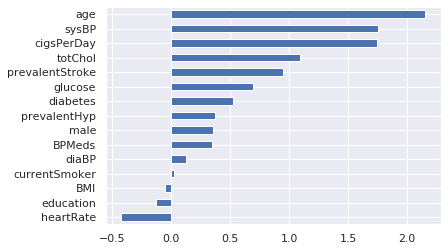

In [0]:
# Plot it
%matplotlib inline
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [0]:
X_test = test[features]
y_test = test[target]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

In [0]:
print('Test Accuracy', model.score(X_test_scaled, y_test))

Test Accuracy 0.8372641509433962


### Pipeline way

In [0]:
hd = pd.read_csv('framingham.csv', header=0)

In [0]:
from sklearn.model_selection import train_test_split
# Split into Train and Test sets
train, test = train_test_split(hd, train_size=.80, test_size=0.20,
                               stratify=hd['TenYearCHD'], random_state=42)
train.shape,  test.shape

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['TenYearCHD'], random_state=42)

train.shape, val.shape, test.shape

((2712, 16), (678, 16), (848, 16))

In [0]:
# Arrange data into X features and y target vector

features = ['BMI', 'cigsPerDay', 'diaBP', 
            'glucose', 'heartRate', 'sysBP',
            'age', 'totChol', 'male', 'education', 
            'currentSmoker', 'prevalentStroke', 
            'prevalentHyp', 'diabetes', 'BPMeds']
target = 'TenYearCHD'

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=42)
)
model.fit(X_train_scaled, y_train)

print ('Validation Accuracy', model.score(X_val_scaled,y_val))

Validation Accuracy 0.8392330383480826


In [0]:
X_test = test[features]
y_test = test.drop(columns=features)
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)


In [0]:
print('Test Accuracy', model.score(X_test_scaled, y_test))

Test Accuracy 0.8372641509433962


### Permutation Importances

In [0]:
!pip install eli5

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_scaled, y_val)

PermutationImportance(cv='prefit',
                      estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_iter=5, random_state=42, refit=True,
                      scoring='accuracy')

In [0]:
permuter.feature_importances_

array([ 0.00058997,  0.00471976, -0.00058997,  0.00324484, -0.00176991,
       -0.00501475,  0.0020649 , -0.00117994, -0.00383481, -0.00501475,
       -0.00058997, -0.00383481, -0.00560472,  0.00412979, -0.00147493])

In [0]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.0047 ± 0.0113,cigsPerDay
0.0041 ± 0.0039,diabetes
0.0032 ± 0.0029,glucose
0.0021 ± 0.0108,age
0.0006 ± 0.0014,BMI
-0.0006 ± 0.0014,currentSmoker
-0.0006 ± 0.0014,diaBP
-0.0012 ± 0.0099,totChol
-0.0015 ± 0.0032,BPMeds
-0.0018 ± 0.0039,heartRate


### Partial Dependence Plots - 1 feature

In [0]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 42kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=0f7a949dcf4fc70a9d53a80ac3423f39c59cd573afd4e71b5a05a9666f267744
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

#examples = pd.concat([example, example2])
for TenYearCHD in range(30, 75):
    examples['sysBP'] = TenYearCHD
    preds = gb.predict(examples)
    for pred in preds:
        plt.scatter(income, pred, color='grey')
    plt.scatter(income, np.mean(preds), color='red')
    plt.title('Partial Dependence')
    plt.xlabel('sysBP')
    plt.ylabel('TenYearCHD')

NameError: ignored

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [0]:
feature='sysBP'

isolated = pdp_isolate(
    model = gb,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature
)

NameError: ignored

In [0]:
# Get feature importances
log_rg = pipeline.named_steps['logisticregression']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
### Nonpipeline way
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

target = ['TenYearCHD']
features = ['BMI', 'cigsPerDay', 'diaBP', 
            'glucose', 'heartRate', 'sysBP',
            'age', 'totChol', 'male', 'education', 
            'currentSmoker', 'prevalentStroke', 
            'prevalentHyp', 'diabetes', 'BPMeds']

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target] 

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('Validation Accuracy', model.score(X_val_scaled, y_val))
print('Test Accuracy', model.score(X_test_scaled, y_test))

### Pipeline way

In [0]:
# Arrange data into X features and y target vector

features = ['BMI', 'cigsPerDay', 'diaBP', 
            'glucose', 'heartRate', 'sysBP',
            'age', 'totChol', 'male', 'education', 
            'currentSmoker', 'prevalentStroke', 
            'prevalentHyp', 'diabetes', 'BPMeds']
target = 'TenYearCHD'

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=42)
)
pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)

print ('Validation Accuracy', model.score(X_val_scaled,y_val))
print('Test Accuracy', model.score(X_test_scaled, y_test))

In [0]:
# features
'BMI', 'cigsPerDay', 'diaBP', 
            'glucose', 'heartRate', 'sysBP',
            'age', 'totChol'